## COM5508 Supervised Word Embeddings "Worldwide Cuisine Similarity"
- Cuisine similarity analysis
- Purpose of our machine learning:Predicting the dish type through ingredients 菜系
- The source of data: Meishijie_a traditional recipe website

### 1. Preprossing data 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/kaggle"))

['Com5508_Supervised Word Embeddings "Worldwide Cuisine Similarity".ipynb', 'submit.csv', 'version 1', 'test.json', 'train.json', '.ipynb_checkpoints', 'network.png', 'sample_submission.csv']


In [2]:
train_df = pd.read_json('/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/kaggle/train.json')
test_df = pd.read_json('/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/kaggle/test.json')

train_df['seperated_ingredients'] = train_df['ingredients'].apply(','.join)
test_df['seperated_ingredients'] = test_df['ingredients'].apply(','.join)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 4 columns):
cuisine                  39774 non-null object
id                       39774 non-null int64
ingredients              39774 non-null object
seperated_ingredients    39774 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 3 columns):
id                       9944 non-null int64
ingredients              9944 non-null object
seperated_ingredients    9944 non-null object
dtypes: int64(1), object(2)
memory usage: 233.1+ KB


In [5]:
train_df.head()

,cuisine,id,ingredients,seperated_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper..."


### 2. Word Embedding

### 3. Descriptive Analysis
#### - Ingredients in a Dish

In [6]:
train_df['ingredients'][1]

['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [8]:
train_df['ingredients'].str.len()

0         9
1        11
2        12
3         4
4        20
5        12
6        13
7        10
8        13
9         6
10       13
11       15
12       10
13       17
14       12
15       10
16        4
17        4
18        4
19       13
20       12
21        6
22        6
23       12
24        9
25       15
26       10
27       11
28       14
29        4
         ..
39744     8
39745     4
39746    19
39747     6
39748     8
39749    14
39750    14
39751    11
39752     5
39753    12
39754    18
39755    14
39756     9
39757     4
39758    16
39759    10
39760     7
39761    18
39762    12
39763     7
39764    14
39765     4
39766    10
39767    13
39768    10
39769    12
39770     7
39771    12
39772    21
39773    12
Name: ingredients, Length: 39774, dtype: int64

In [9]:
print('Maximum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


Text(0.5,1,'Ingredients in a Dish Distribution')

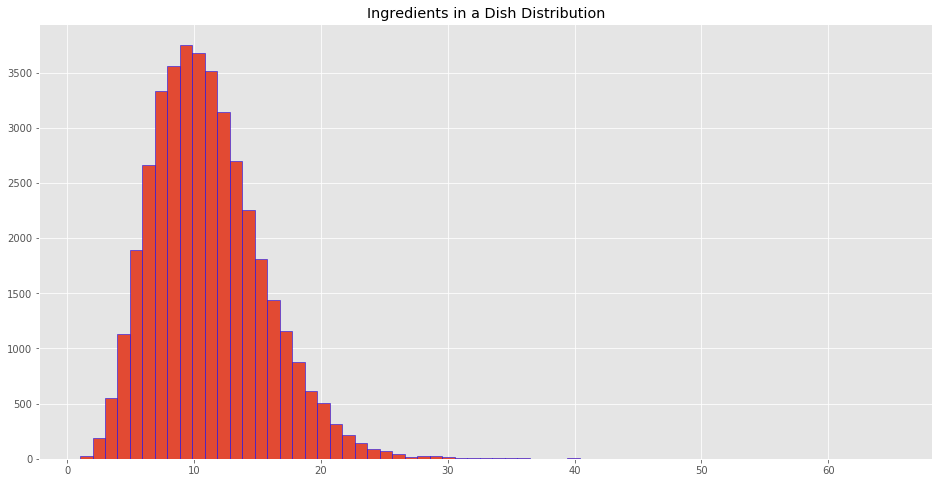

In [10]:
plt.hist(train_df['ingredients'].str.len(),bins=max(train_df['ingredients'].str.len()),edgecolor='b')
plt.gcf().set_size_inches(16,8)
plt.title('Ingredients in a Dish Distribution')

#### - Top Cuisines

Text(0.5,1,'Cuisine Distribution')

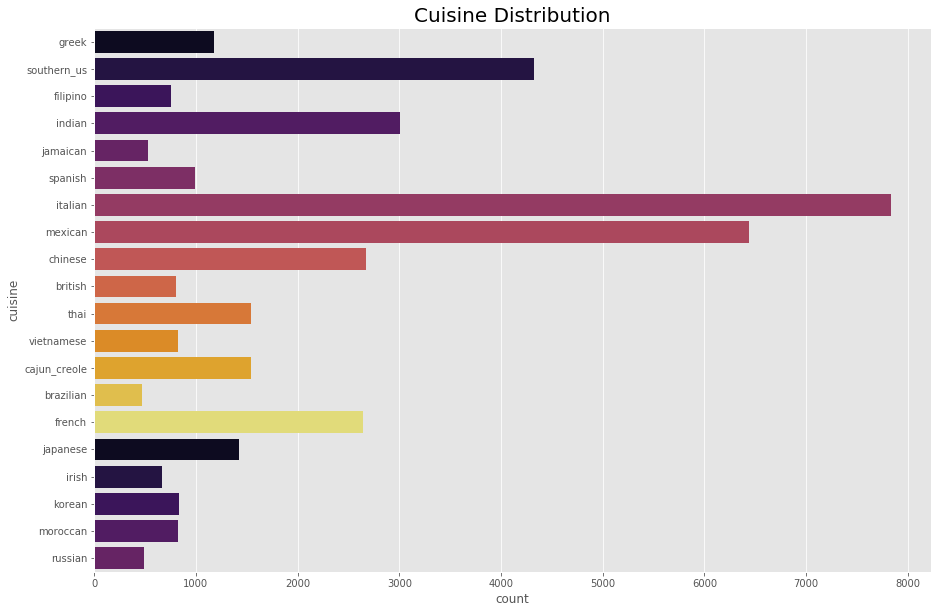

In [11]:
sns.countplot(y='cuisine', data=train_df,palette=sns.color_palette('inferno',15))
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

#### -  Main Ingredients

Text(0.5,1,'Top 15 Ingredients')

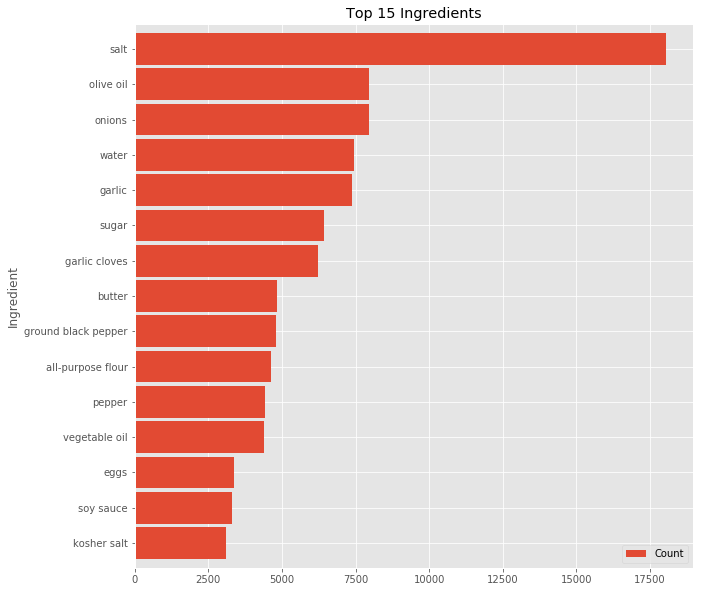

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(train_df['seperated_ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
count.set_index('Ingredient').sort_values('Count',ascending=False)[:15].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 15 Ingredients')

#### -  Finding Similar Dishes

In [26]:
ingreList = []
for index, row in train_df.iterrows():
    ingre = row['ingredients']
    
    for i in ingre:
        if i not in ingreList:
            ingreList.append(i)
def binary(ingre_list):
    binaryList = []
    
    for item in ingreList:
        if item in ingre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
train_df['bin ingredients']=train_df['ingredients'].apply(lambda x: binary(x))

In [33]:
train_df

,cuisine,id,ingredients,seperated_ingredients,bin ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","plain flour,sugar,butter,eggs,fresh ginger roo...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...","olive oil,salt,medium shrimp,pepper,garlic,cho...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...","sugar,pistachio nuts,white almond bark,flour,v...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...","olive oil,purple onion,fresh pineapple,pork,po...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...","chopped tomatoes,fresh basil,garlic,extra-virg...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:
from scipy import spatial

def Similarity(Id1, Id2):
    a = train_df.iloc[Id1]
    b = train_df.iloc[Id2]
    
    A = a['bin ingredients']
    B = b['bin ingredients']
    distance=spatial.distance.cosine(A,B)
    
    return distance, Id2

#### -  Dishes Similar to Dish No 1¶

In [9]:
food=[]
for i in train_df.index:
    food.append(Similarity(1,i))
common_ingredients=sorted(food,key=lambda x: x[0])[1:10]
indexes=[]
for i in range(len(common_ingredients)):
    indexes.append(common_ingredients[i][1])
train_df.iloc[indexes]

,cuisine,id,ingredients,seperated_ingredients,bin ingredients
26308,british,42852,"[eggs, vegetable oil, onions, ground black pep...","eggs,vegetable oil,onions,ground black pepper,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
5909,southern_us,46403,"[ground black pepper, cucumber, eggs, salt, mi...","ground black pepper,cucumber,eggs,salt,milk,al...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
26464,southern_us,42450,"[flour, milk, salt, eggs, vegetable oil, yello...","flour,milk,salt,eggs,vegetable oil,yellow corn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
6215,southern_us,1915,"[ground black pepper, yellow corn meal, salt, ...","ground black pepper,yellow corn meal,salt,oliv...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
15862,southern_us,30967,"[green tomatoes, yellow corn meal, salt, veget...","green tomatoes,yellow corn meal,salt,vegetable...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
22917,british,47160,"[milk, eggs, plain flour, salt, pepper]","milk,eggs,plain flour,salt,pepper","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
29322,british,21644,"[plain flour, sausages, milk, salt, eggs]","plain flour,sausages,milk,salt,eggs","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
31153,british,20621,"[beef drippings, plain flour, salt, eggs, milk]","beef drippings,plain flour,salt,eggs,milk","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
36409,filipino,18421,"[vegetable oil, eggs, asian eggplants, salt, g...","vegetable oil,eggs,asian eggplants,salt,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


In [32]:
#train_df.index

RangeIndex(start=0, stop=39774, step=1)

#### - Top Bigrams by Cuisines

In [10]:
import nltk
from collections import Counter

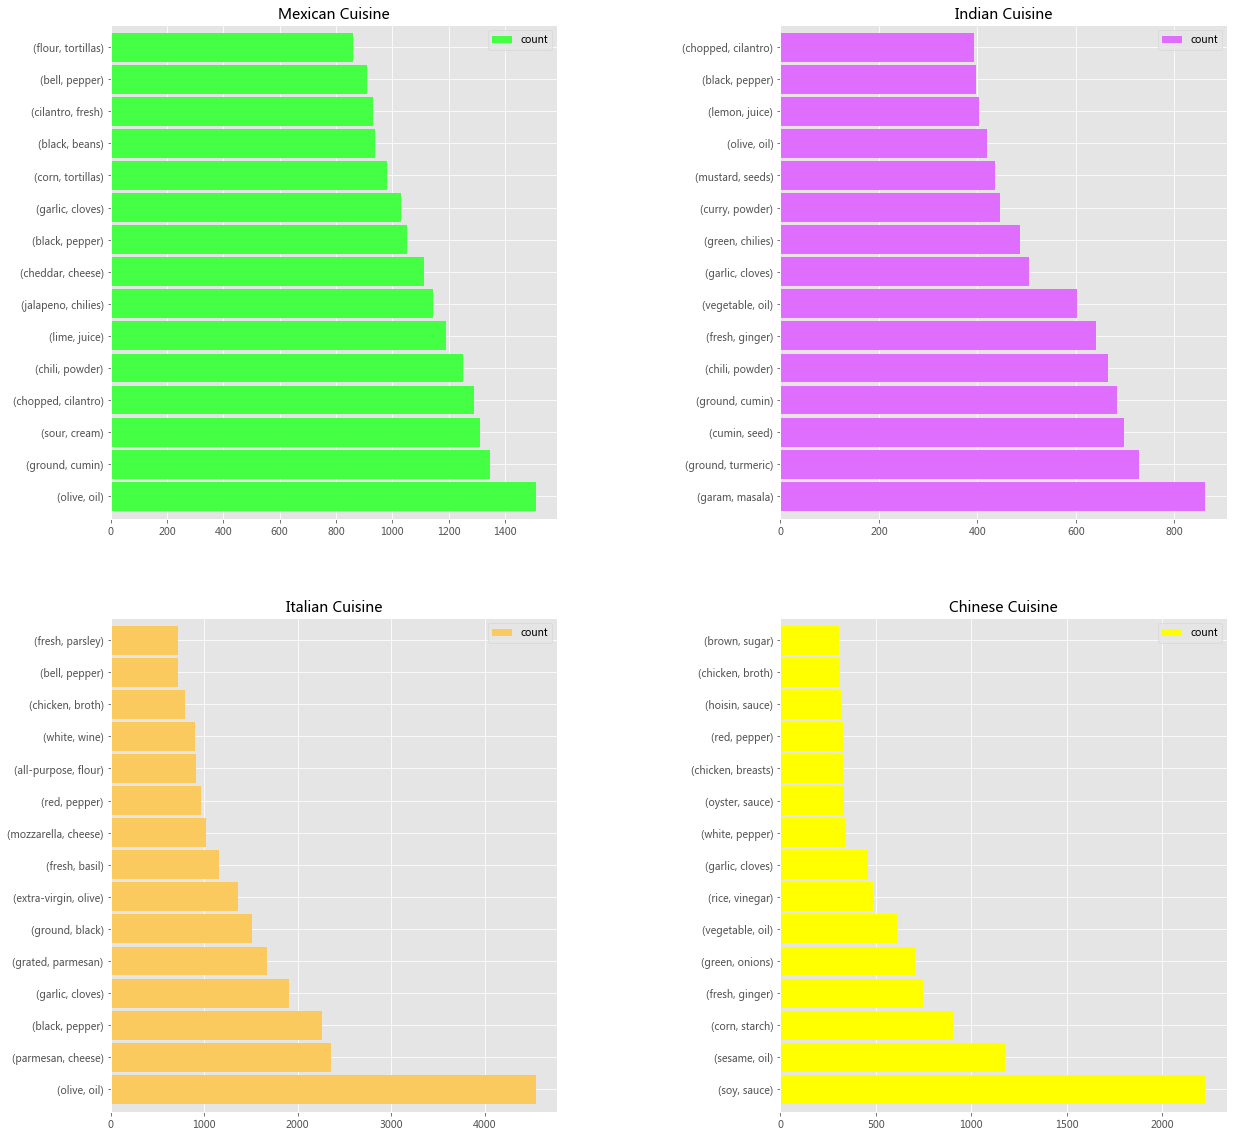

In [11]:
train_df['for ngrams']=train_df['seperated_ingredients'].str.replace(',',' ')
f,ax=plt.subplots(2,2,figsize=(20,20))
def ingre_cusine(cuisine):
    frame=train_df[train_df['cuisine']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:15]
ingre_cusine('mexican').plot.barh(ax=ax[0,0],width=0.9,color='#45ff45')
ax[0,0].set_title('Mexican Cuisine')
ingre_cusine('indian').plot.barh(ax=ax[0,1],width=0.9,color='#df6dfd')
ax[0,1].set_title('Indian Cuisine')
ingre_cusine('italian').plot.barh(ax=ax[1,0],width=0.9,color='#fbca5f')
ax[1,0].set_title('Italian Cuisine')
ingre_cusine('chinese').plot.barh(ax=ax[1,1],width=0.9,color='#ffff00')
ax[1,1].set_title('Chinese Cuisine')
plt.subplots_adjust(wspace=0.5)

### Network Diagrams for Bigrams

In [12]:
import networkx as nx
def generate_ngrams(text, n):
    words = text.split(' ')
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]
def net_diagram(*cuisines):
    ngrams = {}
    for title in train_df[train_df.cuisine==cuisines[0]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df.columns = ['count']
    ngrams_mws_df['cusine'] = cuisines[0]
    ngrams_mws_df.reset_index(level=0, inplace=True)

    ngrams = {}
    for title in train_df[train_df.cuisine==cuisines[1]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df1 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df1.columns = ['count']
    ngrams_mws_df1['cusine'] = cuisines[1]
    ngrams_mws_df1.reset_index(level=0, inplace=True)
    cuisine1=ngrams_mws_df.sort_values('count',ascending=False)[:25]
    cuisine2=ngrams_mws_df1.sort_values('count',ascending=False)[:25]
    df_final=pd.concat([cuisine1,cuisine2])
    g = nx.from_pandas_edgelist(df_final,source='cusine',target='index')
    cmap = plt.cm.RdYlGn
    colors = [n for n in range(len(g.nodes()))]
    k = 0.35
    pos=nx.spring_layout(g, k=k)
    nx.draw_networkx(g,pos, node_size=df_final['count'].values*8, cmap = cmap, node_color=colors, edge_color='grey', font_size=15, width=3)
    plt.title("Top 25 Bigrams for %s and %s" %(cuisines[0],cuisines[1]), fontsize=30)
    plt.gcf().set_size_inches(30,30)
    plt.show()
    plt.savefig('network.png')

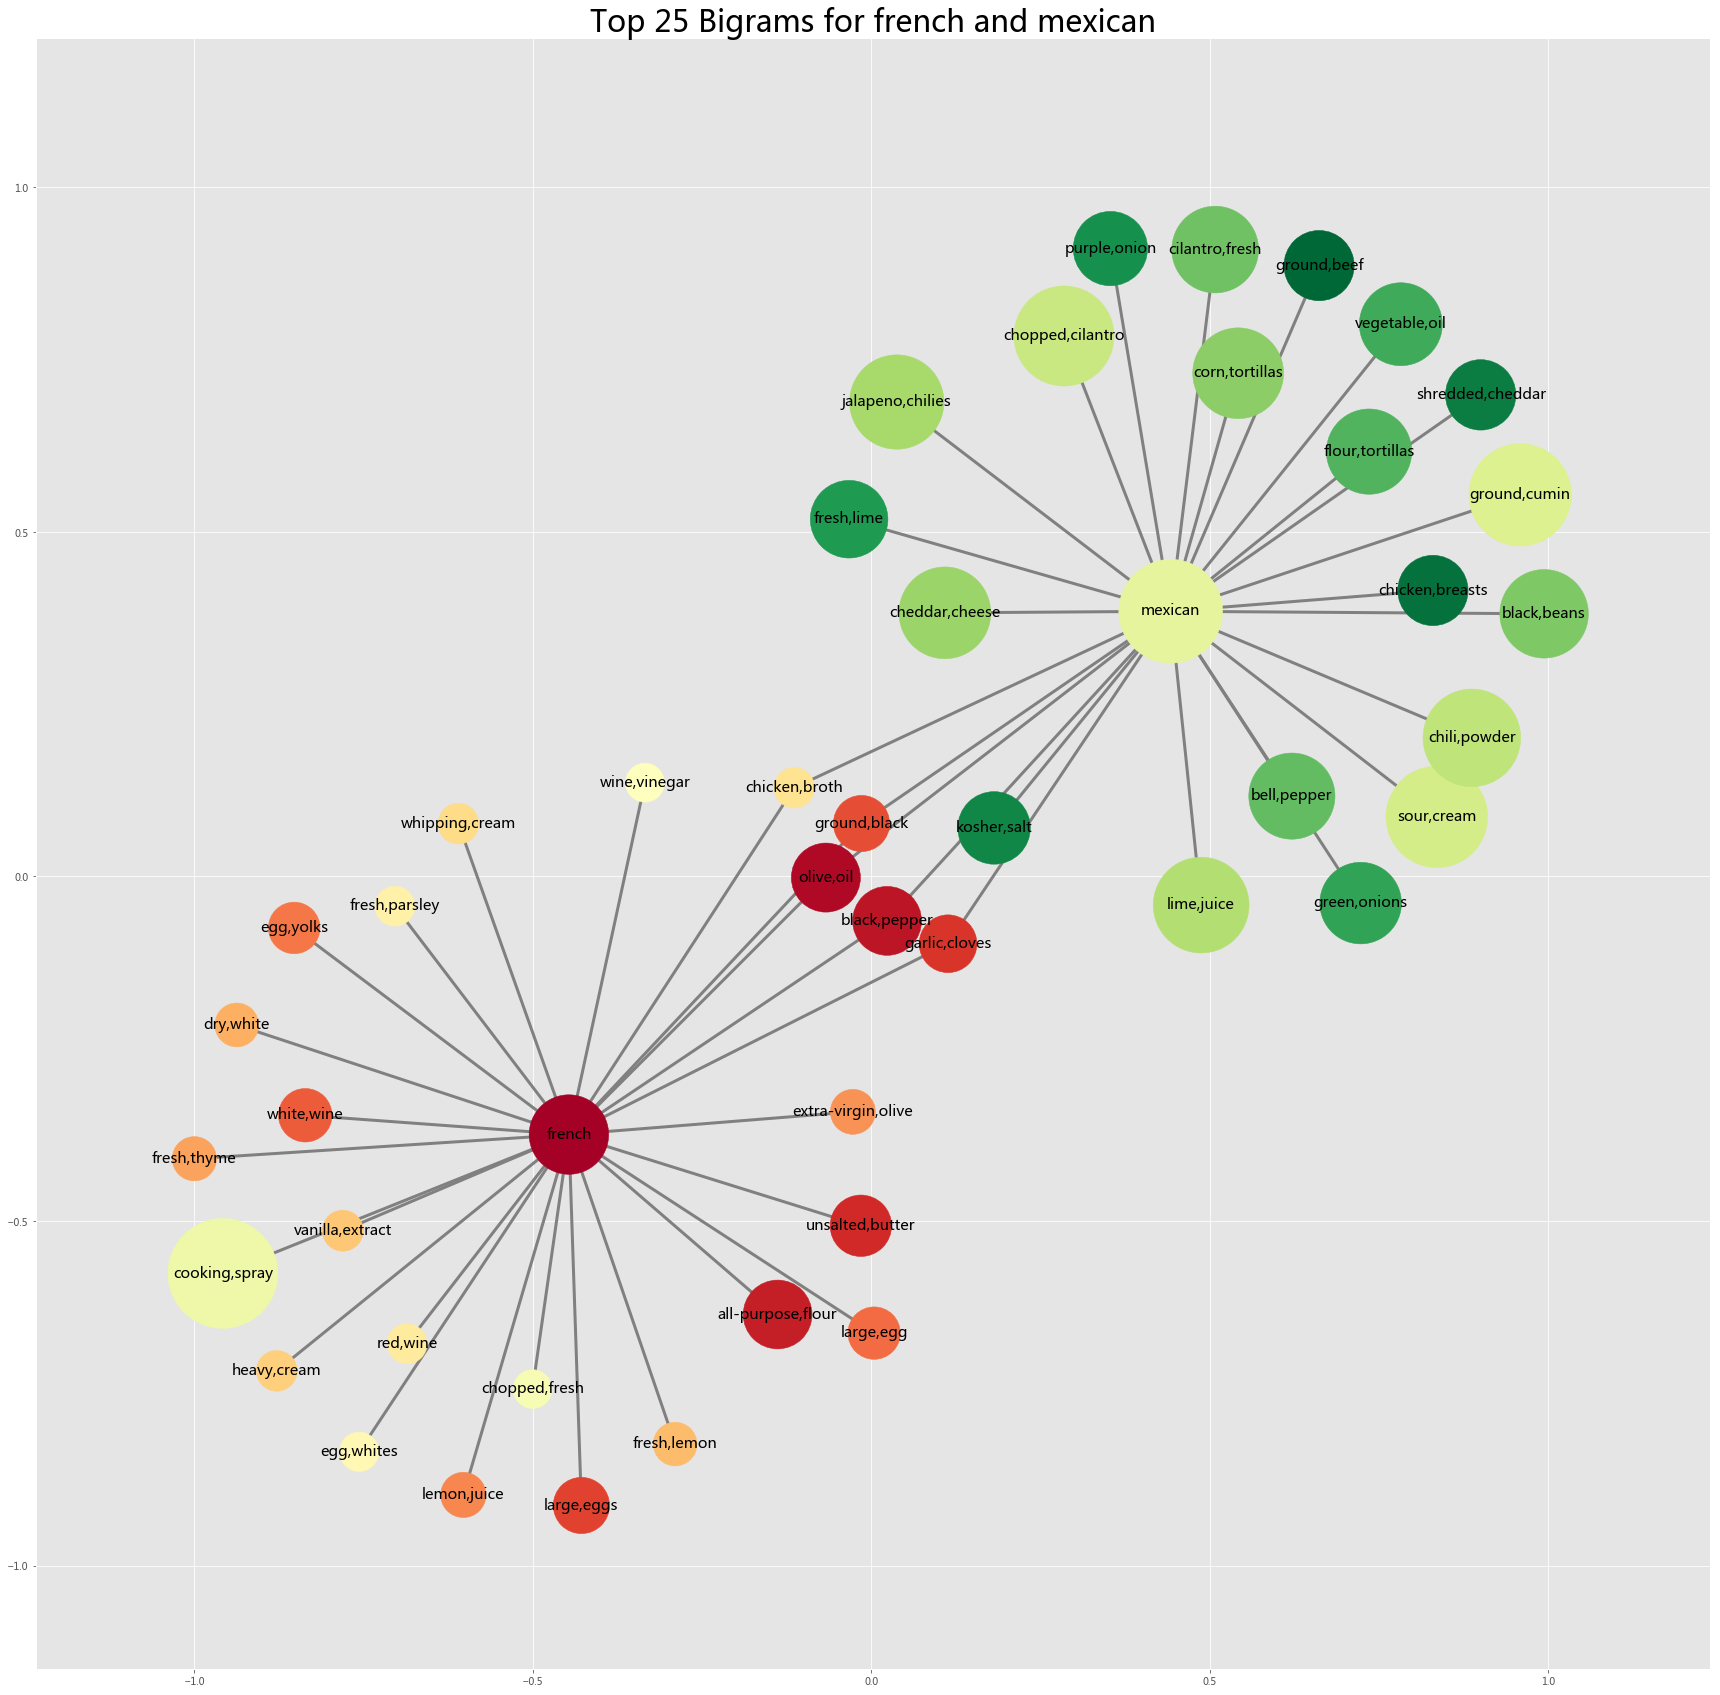

<Figure size 432x288 with 0 Axes>

In [13]:
net_diagram('french','mexican')

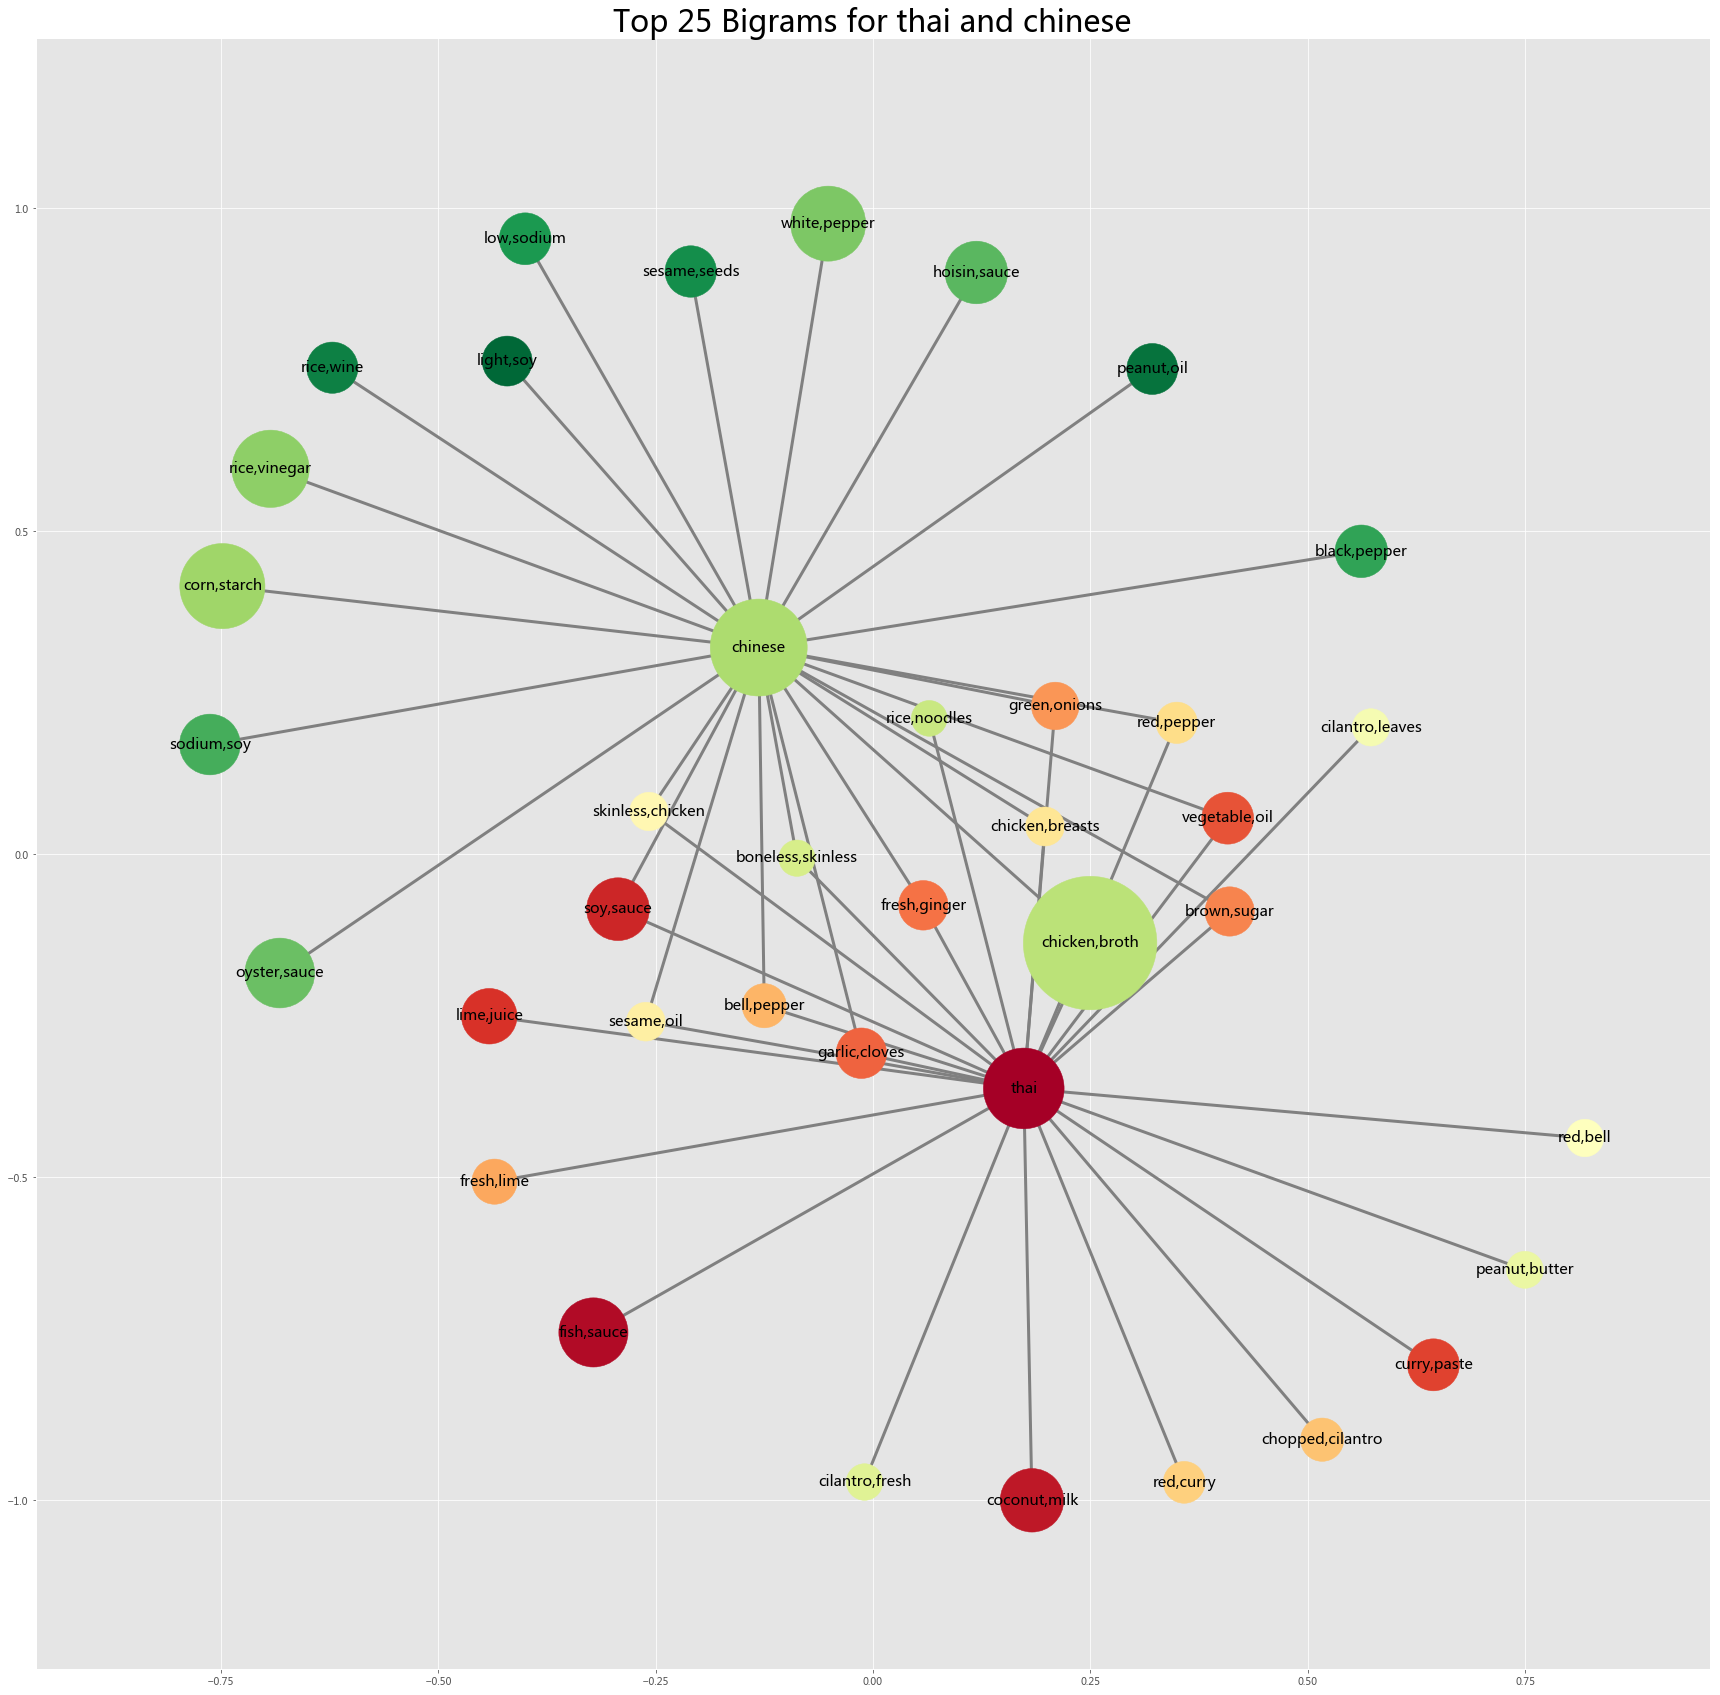

<Figure size 432x288 with 0 Axes>

In [14]:
net_diagram('thai','chinese')

### Modeling

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(train_df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(train_df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
Result_transformed = vect.transform(test_df['seperated_ingredients'].values)
Result_transformed = Result_transformed.astype('float')

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_df.cuisine)

In [39]:
train_df['seperated_ingredients'].values

array(['romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles',
       'plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil',
       'eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers',
       ...,
       'eggs,citrus fruit,raisins,sourdough starter,flour,hot tea,sugar,ground nutmeg,salt,ground cinnamon,milk,butter',
       'boneless chicken skinless thigh,minced garlic,steamed white rice,baking powder,corn starch,dark soy sauce,kosher salt,peanuts,flour,scallions,Chinese rice vinegar,vodka,fresh ginger,egg whites,broccoli,toasted sesame seeds,sugar,store bought low sodium chicken stock,baking soda,Shaoxing wine,oil',
       'green chile,jalapeno chilies,onions,ground black pepper,salt,chopped cilantro fresh,green bell pepper,garlic,white sugar,roma tomatoes,celery,dried

### Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

0.7942477876106194

In [17]:
y_pred = clf1.predict(X_test) 

In [18]:
# recall, f1
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score
f1 = f1_score(y_test, y_pred,average='micro')
print(f1)

0.7942477876106194


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       120
           1       0.59      0.46      0.52       198
           2       0.76      0.72      0.74       362
           3       0.82      0.86      0.84       696
           4       0.75      0.59      0.66       181
           5       0.62      0.66      0.64       658
           6       0.82      0.68      0.75       302
           7       0.87      0.91      0.89       783
           8       0.66      0.48      0.56       159
           9       0.81      0.89      0.85      1932
          10       0.85      0.74      0.79       147
          11       0.81      0.72      0.76       348
          12       0.80      0.77      0.78       183
          13       0.91      0.92      0.92      1631
          14       0.82      0.79      0.81       199
          15       0.60      0.45      0.51       118
          16       0.72      0.80      0.76      1076
          17       0.68    

### SVC

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train)
vclf.score(X_test, y_test)

0.8153660498793243

In [25]:
y_pred_2 = vclf.predict(X_test) 

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70       120
           1       0.64      0.56      0.59       198
           2       0.77      0.74      0.76       362
           3       0.83      0.87      0.85       696
           4       0.83      0.67      0.74       181
           5       0.67      0.71      0.69       658
           6       0.79      0.73      0.76       302
           7       0.89      0.92      0.91       783
           8       0.71      0.60      0.65       159
           9       0.83      0.90      0.86      1932
          10       0.87      0.77      0.82       147
          11       0.83      0.74      0.78       348
          12       0.80      0.79      0.80       183
          13       0.93      0.93      0.93      1631
          14       0.81      0.84      0.82       199
          15       0.62      0.55      0.58       118
          16       0.76      0.81      0.79      1076
          17       0.73    

In [28]:
from sklearn.multiclass import OneVsRestClassifier

In [29]:
estimator = SVC(C=100, # penalty parameter
                kernel='rbf', # kernel type, rbf working fine here
                degree=3, # default value
                gamma=1, # kernel coefficient
                coef0=1, # change to 1 from default value of 0.0
                shrinking=True, # using shrinking heuristics
                tol=0.001, # stopping criterion tolerance 
                probability=False, # no need to enable probability estimates
                cache_size=200, # 200 MB cache size
                class_weight=None, # all classes are treated equally 
                verbose=False, # print the logs 
                max_iter=-1, # no limit, let it run
                decision_function_shape=None, # will use one vs rest explicitly 
                random_state=None)
classifier = OneVsRestClassifier(estimator, n_jobs=-1)

In [30]:
classifier.fit(X_train , y_train)
classifier.score(X_test, y_test)

0.8199919549477072

In [31]:
y_pred_3 = classifier.predict(X_test) 

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       120
           1       0.64      0.56      0.60       198
           2       0.78      0.75      0.76       362
           3       0.83      0.88      0.86       696
           4       0.88      0.67      0.76       181
           5       0.67      0.69      0.68       658
           6       0.79      0.73      0.76       302
           7       0.89      0.93      0.91       783
           8       0.72      0.61      0.66       159
           9       0.83      0.91      0.87      1932
          10       0.90      0.76      0.82       147
          11       0.84      0.73      0.78       348
          12       0.81      0.78      0.79       183
          13       0.92      0.93      0.92      1631
          14       0.85      0.84      0.85       199
          15       0.66      0.56      0.61       118
          16       0.78      0.82      0.80      1076
          17       0.74    

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
#scores = cross_val_score(rfc, X, y)
#print(scores.mean())    

In [36]:
rfc.fit(X_train , y_train)
rfc.score(X_test, y_test)

0.6956958970233307

In [38]:
y_pred_4=rfc.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.73      0.41      0.52       120
           1       0.42      0.27      0.33       198
           2       0.61      0.61      0.61       362
           3       0.65      0.84      0.73       696
           4       0.58      0.36      0.44       181
           5       0.48      0.53      0.50       658
           6       0.75      0.56      0.64       302
           7       0.77      0.87      0.82       783
           8       0.60      0.30      0.40       159
           9       0.70      0.86      0.77      1932
          10       0.78      0.33      0.47       147
          11       0.70      0.53      0.61       348
          12       0.69      0.42      0.52       183
          13       0.82      0.89      0.85      1631
          14       0.79      0.57      0.66       199
          15       0.71      0.20      0.32       118
          16       0.63      0.66      0.64      1076
          17       0.78    

In [19]:
y_predicted = vclf.predict(Result_transformed)
y_predicted_final = encoder.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test_df.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('submit.csv', index = False)

In [42]:
df_2 = pd.read_csv('/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/cleaning_recipe.csv')
df_2

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients
0,0,剁椒茉莉花炒鸡肉,炒,2人份,咸&鲜,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...,25,4194,"剁椒茉莉花,莲藕,胡萝卜,芹菜,黄瓜,鸡胸肉,小葱,蒜,姜,盐,酱油,蚝油,花椒油,鸡粉,白胡椒粉","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['剁椒茉莉花', '莲藕', '胡萝卜', '芹菜', '黄瓜', '鸡胸肉', '小葱'..."
1,1,宽汤羊肉揪面片,煮,4人份,咸&鲜,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...,32,6207,"饺子粉,羊肉,土豆,西红柿,胡萝卜,菠菜,干红辣椒,花椒,胡椒粉,大蒜,葱,香菜,香醋","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['饺子粉', '羊肉', '土豆', '西红柿', '胡萝卜', '菠菜', '干红辣椒'..."
2,2,红三剁,炒,2人份,咸&鲜,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末,28,5214,"瘦肉,西红柿,青椒,酱油,料酒,淀粉,盐,姜末","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","['瘦肉', '西红柿', '青椒', '酱油', '料酒', '淀粉', '盐', '姜末']"
3,3,火腿清汤鸡,炖,4人份,咸&鲜,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...,0,2625,"鸡腿,火腿,鸡枞菌,生姜,食盐,胡椒粉,八角,花椒,桂皮,香叶,干姜,陈皮,当归,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['鸡腿', '火腿', '鸡枞菌', '生姜', '食盐', '胡椒粉', '八角', '..."
4,4,云南香辣凉拌卷粉,拌,2人份,香&辣,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱,18,7287,"肠粉皮,鸡枞油,大葱,酱油,醋,食盐,味精,五香粉,白芝麻,植物油,白糖,番茄酱","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","['肠粉皮', '鸡枞油', '大葱', '酱油', '醋', '食盐', '味精', '五..."
5,5,浇汁汆斑鱼,汆,2人份,咸&鲜,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱,11,13886,"乌鳢,花生油,食盐,醋,姜,蒜,花椒,小米椒,蒸鱼豉油,胡椒,小葱","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","['乌鳢', '花生油', '食盐', '醋', '姜', '蒜', '花椒', '小米椒'..."
6,6,酸汤金菇肥牛,煮,2人份,酸&辣,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤,154,33835,"金针菇,肥牛,红尖椒,尖椒,食盐,鸡精,姜,蒜,植物油,水,红酸汤","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","['金针菇', '肥牛', '红尖椒', '尖椒', '食盐', '鸡精', '姜', '蒜..."
7,7,洋芋饭,焖,3人份,咸&鲜,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油,51,23636,"大米,土豆,食盐,植物油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['大米', '土豆', '食盐', '植物油']"
8,8,香芋汽锅乌鸡,蒸,2人份,咸&鲜,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒,2,6466,"乌骨鸡,虫草花,芋头,食盐,葱,姜,黄酒","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","['乌骨鸡', '虫草花', '芋头', '食盐', '葱', '姜', '黄酒']"
9,9,酸菜版老奶洋芋,炒,2人份,香&辣,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...,10,14824,"土豆,酸菜,胡萝卜,食盐,酱油,姜,蒜,八角,小米椒,料酒,小葱,花椒粉,孜然,五香粉,植物...","[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","['土豆', '酸菜', '胡萝卜', '食盐', '酱油', '姜', '蒜', '八角'..."
